In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import scipy
from sklearn.cluster import DBSCAN
from scipy import signal


In [ ]:
def detect_peaks(x, num_train, num_guard, rate_fa):
    """
    Detect peaks with CFAR algorithm.
    
    num_train: Number of training cells.
    num_guard: Number of guard cells.
    rate_fa: False alarm rate. 
    """
    num_cells = x.size
    num_train_half = round(num_train / 2)
    num_guard_half = round(num_guard / 2)
    num_side = num_train_half + num_guard_half
 
    alpha = num_train*(rate_fa**(-1/num_train) - 1) # threshold factor
    
    peak_idx = []
    for i in range(num_side, num_cells - num_side):
        
        if i != i-num_side+np.argmax(x[i-num_side:i+num_side+1]): 
            continue
        
        sum1 = np.sum(x[i-num_side:i+num_side+1])
        sum2 = np.sum(x[i-num_guard_half:i+num_guard_half+1]) 
        p_noise = (sum1 - sum2) / num_train 
        threshold = alpha * p_noise
        
        if x[i] > threshold: 
            peak_idx.append(i)
    
    peak_idx = np.array(peak_idx, dtype=int)
    
    return peak_idx


def plot_signal(data):
    x = np.arange(data.size)
    
    # Detect peaks
    peak_idx = detect_peaks(data, num_train=200, num_guard=1, rate_fa=0.001)
    print(peak_idx)
    
    plt.plot(x, data, 'o', markersize=1)
    plt.plot(x[peak_idx], data[peak_idx], 'rD')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

skip_samples=0
dataset = np.array([])
for file in sorted(glob.glob('data/csv/*')):
    print(file)
    data = np.loadtxt(file, delimiter=',')
    complex_data = np.vectorize(complex)(data[skip_samples:, 0], data[skip_samples:, 1])
    data = 20 * np.log10(abs(complex_data)) 
    print(np.shape(data))
    filtered_data = signal.medfilt(data, 105)
    
    plt.plot(data)
    plt.plot(filtered_data)
    plt.show()
    
    div = data-filtered_data
    div[div<0] = 0
    plot_signal(div)


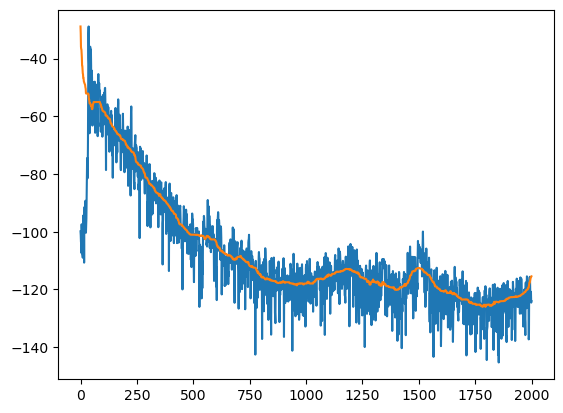

[225 564]


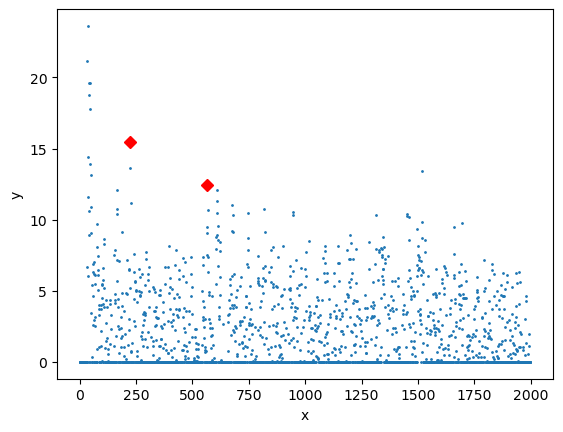

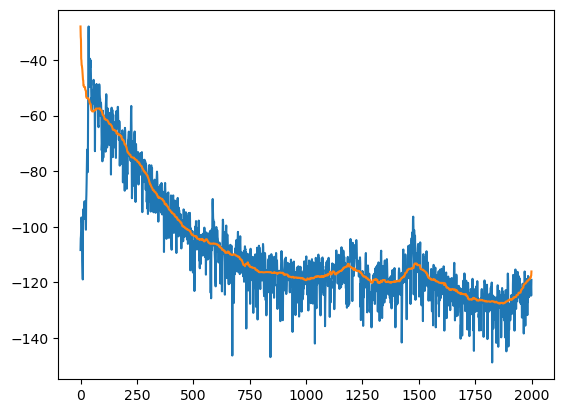

[ 225  586 1333 1475 1894]


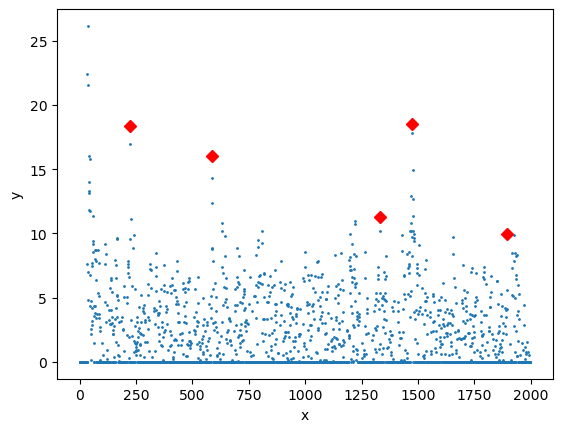

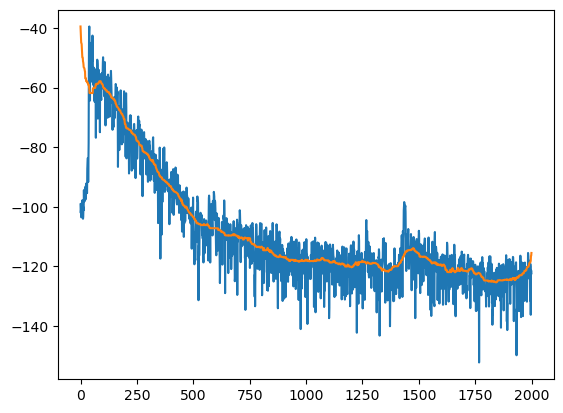

[1267 1435]


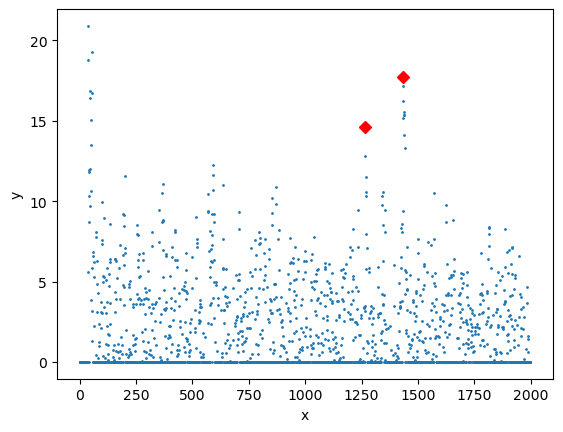

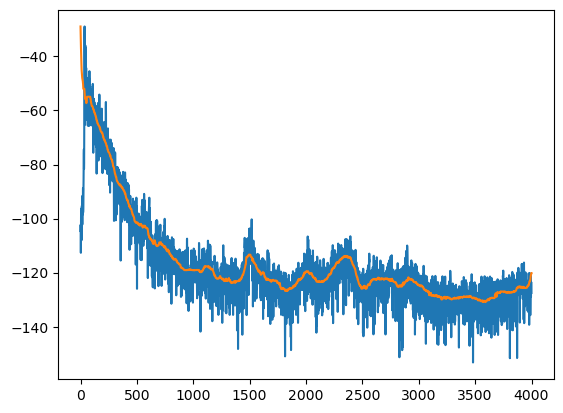

[ 225  945 1266 3279]


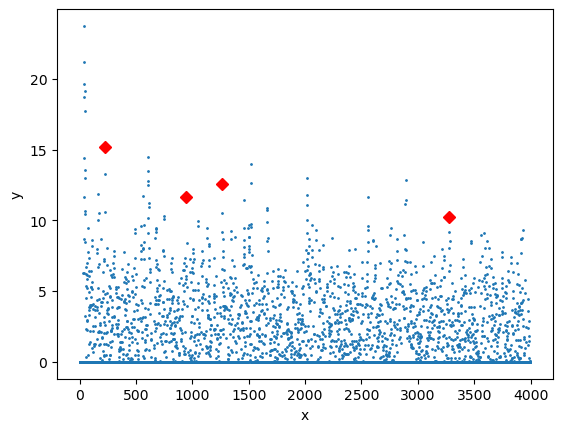

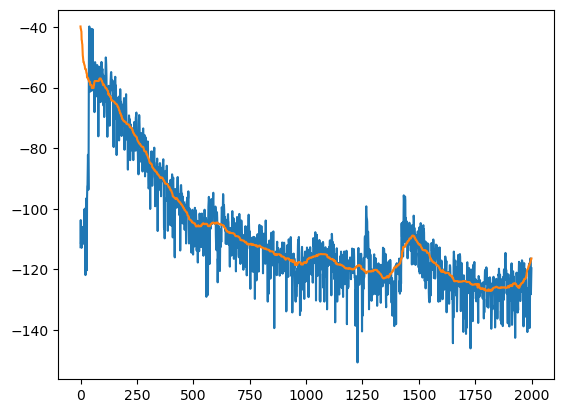

[1267]


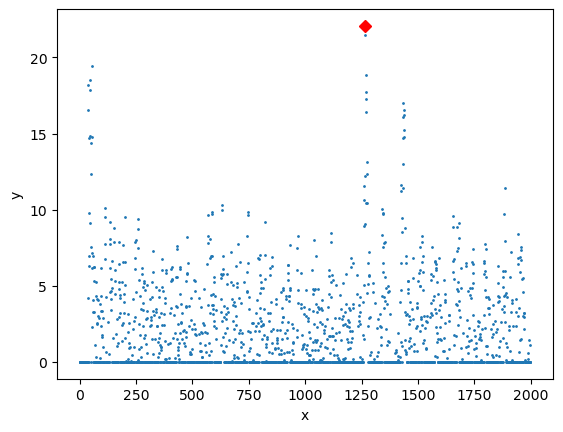

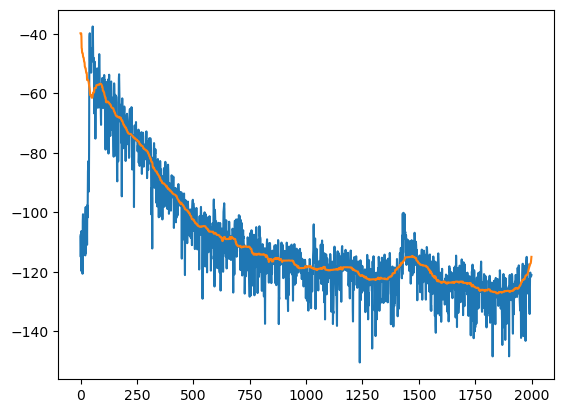

[1034 1428]


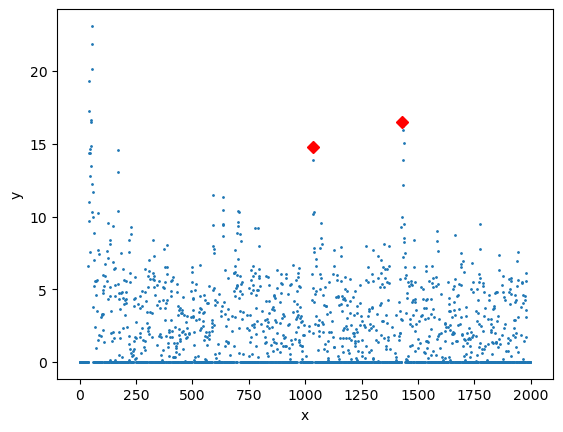

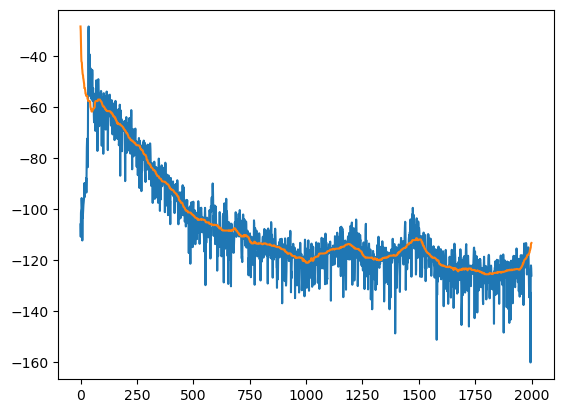

[ 586 1265]


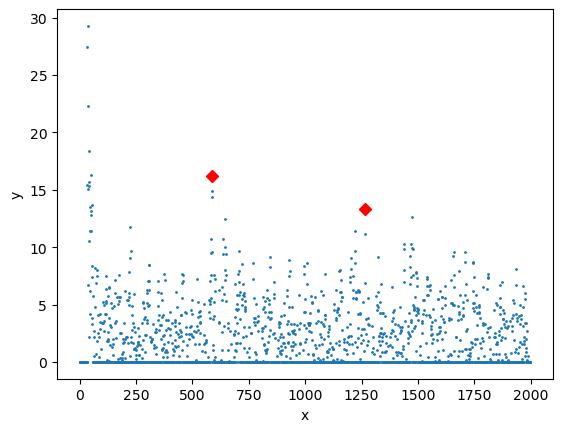

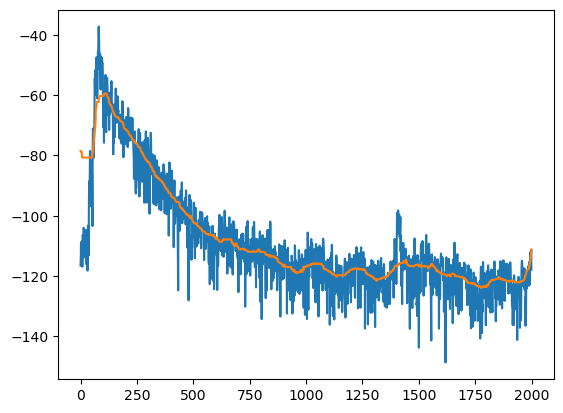

[1408 1658]


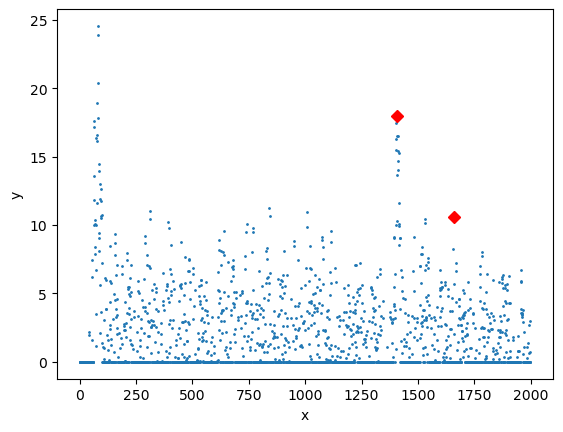

In [15]:
dataset = np.array([])
for file in sorted(glob.glob('data/matlab/*')):
    file_name = file.split("\\")[1]
    data = scipy.io.loadmat(file)[file_name[:-4]]
    data = data.flatten()
    filtered_data = signal.medfilt(data, 105)
    
    plt.plot(data)
    plt.plot(filtered_data)
    plt.show()
    
    div = data-filtered_data
    div[div<0] = 0
    plot_signal(div)